In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import cluster, metrics
import time
import cv2
from matplotlib.image import imread
from sklearn import preprocessing
import random
from IPython.display import display, Image
from PIL import Image
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import tensorflow_hub as hub
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import manifold



In [2]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [4]:
data.shape

(1050, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
def missing_values_by_column1(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "sum" par colonne pour compter les valeurs manquantes par colonne
    missing_values_count = missing_values.sum()
    return missing_values_count

In [7]:
missing_values_by_column1(data)

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [8]:
data["product_category_tree"][0]


'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [9]:
data["description"][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [10]:
data["product_specifications"][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [14]:
#colonnes qui peuvent etre interessante pour notre analyse
data_visu= data[["product_specifications","description","product_category_tree"]]

In [15]:
data_visu

product_specifications  \
0     {"product_specification"=>[{"key"=>"Brand", "v...   
1     {"product_specification"=>[{"key"=>"Machine Wa...   
2     {"product_specification"=>[{"key"=>"Material",...   
3     {"product_specification"=>[{"key"=>"Brand", "v...   
4     {"product_specification"=>[{"key"=>"Machine Wa...   
...                                                 ...   
1045  {"product_specification"=>[{"key"=>"Number of ...   
1046  {"product_specification"=>[{"key"=>"Number of ...   
1047  {"product_specification"=>[{"key"=>"Number of ...   
1048  {"product_specification"=>[{"key"=>"Number of ...   
1049  {"product_specification"=>[{"key"=>"Sales Pack...   

                                            description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                  product_category_tree  
0     ["Home Furnishing >> Curtains & Accessories >>...  
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  
...                                                 ...  
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  

[1050 rows x 3 columns]

In [16]:
# Sélectionner les colonnes 'description' et 'product_category_tree'
data_subset = data[["description", "product_category_tree"]]

# Fonction pour extraire la sous-catégorie
def extract_subcategory(category_tree, level):
    categories = category_tree.split(">>")
    if len(categories) > level:
        return categories[level].strip()
    else:
        return None

# Appliquer la fonction pour extraire les sous-catégories
data_subset["subcategory_1"] = data_subset["product_category_tree"].apply(lambda x: extract_subcategory(x, 0))
data_subset["subcategory_2"] = data_subset["product_category_tree"].apply(lambda x: extract_subcategory(x, 1))

C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\1207932708.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["subcategory_1"] = data_subset["product_category_tree"].apply(lambda x: extract_subcategory(x, 0))
C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\1207932708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["subcategory_2"] = data_subset["product_category_tree"].apply(lambda x: extract_subcategory(x, 1))


In [17]:
data_subset

description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                  product_category_tree      subcategory_1  \
0     ["Home Furnishing >> Curtains & Accessories >>...  ["Home Furnishing   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        ["Baby Care   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        ["Baby Care   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  ["Home Furnishing   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  ["Home Furnishing   
...                                                 ...                ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        ["Baby Care   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        ["Baby Care   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        ["Baby Care   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        ["Baby Care   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        ["Baby Care   

               subcategory_2  
0     Curtains & Accessories  
1           Baby Bath & Skin  
2           Baby Bath & Skin  
3                  Bed Linen  
4                  Bed Linen  
...                      ...  
1045       Baby & Kids Gifts  
1046       Baby & Kids Gifts  
1047       Baby & Kids Gifts  
1048       Baby & Kids Gifts  
1049       Baby & Kids Gifts  

[1050 rows x 4 columns]

In [19]:
# Nombre d'éléments uniques dans la colonne 'subcategory_1'
unique_subcategory_1 = data_subset["subcategory_1"].nunique()
print(f"Nombre d'éléments uniques dans la colonne 'subcategory_1': {unique_subcategory_1}")

# Nombre d'éléments uniques dans la colonne 'subcategory_2'
unique_subcategory_2 = data_subset["subcategory_2"].nunique()
print(f"Nombre d'éléments uniques dans la colonne 'subcategory_2': {unique_subcategory_2}")


Nombre d'éléments uniques dans la colonne 'subcategory_1': 7
Nombre d'éléments uniques dans la colonne 'subcategory_2': 63


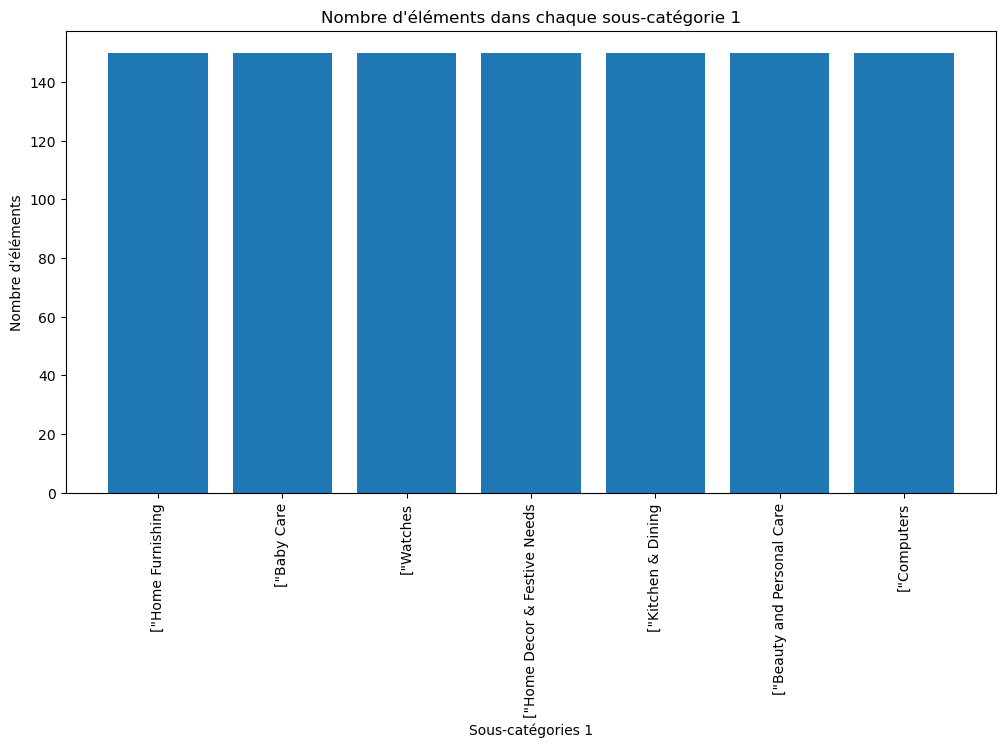

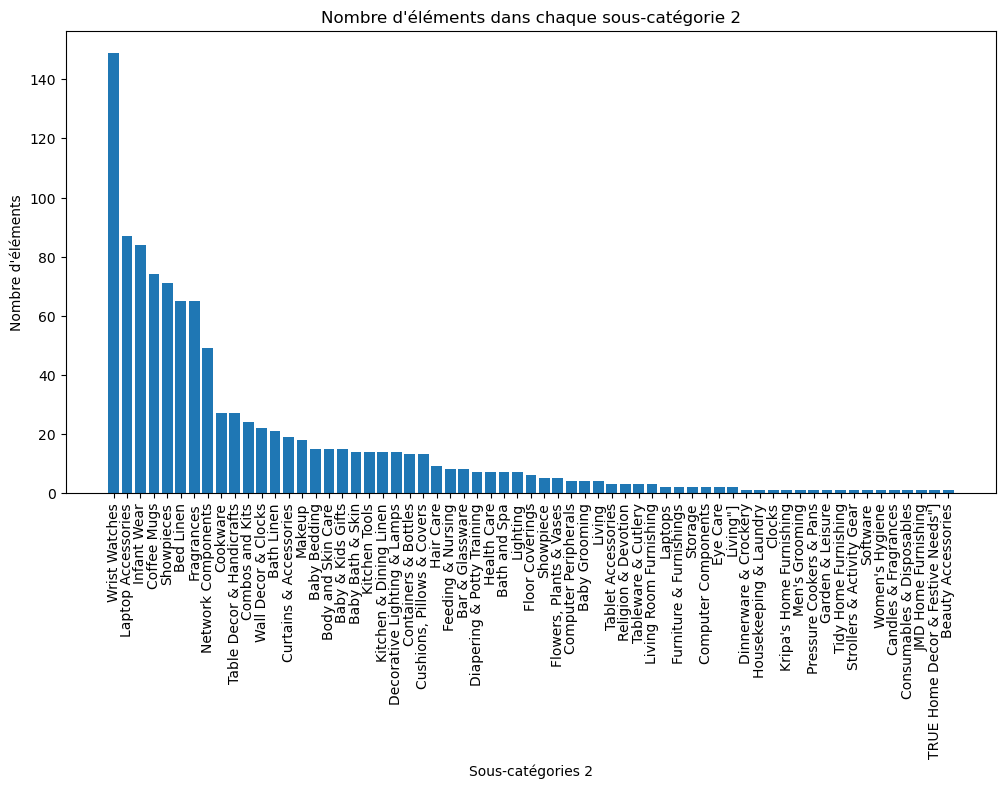

In [20]:

# Obtenir le décompte des éléments dans chaque sous-catégorie
subcategory_1_counts = data_subset["subcategory_1"].value_counts()
subcategory_2_counts = data_subset["subcategory_2"].value_counts()

# Créer un diagramme à barres pour la colonne 'subcategory_1'
plt.figure(figsize=(12, 6))
plt.bar(subcategory_1_counts.index, subcategory_1_counts.values)
plt.xlabel("Sous-catégories 1")
plt.ylabel("Nombre d'éléments")
plt.title("Nombre d'éléments dans chaque sous-catégorie 1")
plt.xticks(rotation=90)
plt.show()

# Créer un diagramme à barres pour la colonne 'subcategory_2'
plt.figure(figsize=(12, 6))
plt.bar(subcategory_2_counts.index, subcategory_2_counts.values)
plt.xlabel("Sous-catégories 2")
plt.ylabel("Nombre d'éléments")
plt.title("Nombre d'éléments dans chaque sous-catégorie 2")
plt.xticks(rotation=90)
plt.show()

# Nettoyage du texte 

In [21]:

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)
## Stop Word

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\boukh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boukh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Convertir le texte en minuscules avec la méthode lower().
- Supprime la ponctuation du texte en utilisant la méthode translate()
- tokenise le texte en utilisant la méthode word_tokenize() pour diviser le texte en mots individuels.
- télécharge les stopwords de la langue anglaise avec nltk.download('stopwords').
- Charger une liste de stopwords de la langue anglaise. Ensuite, parcourt chaque mot du texte donné en entrée et vérifie s'il fait partie de la liste des stopwords. Si un mot est considéré comme un stop word, il est exclu du texte final nettoyé.
- Enfin, il renvoie le texte nettoyé en rejoignant les mots filtrés avec un espace entre eux.

In [22]:
df = data_subset

In [23]:
df["subcategory_1"] = df["subcategory_1"].apply(lambda x: x[2:])


C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\1621675598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["subcategory_1"] = df["subcategory_1"].apply(lambda x: x[2:])


In [24]:
df['cleaned_text'] = data_visu['description'].apply(clean_text)
df['cleaned_text'] 

C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\2107462925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = data_visu['description'].apply(clean_text)


0       key features elegance polyester multicolor abs...
1       specifications sathiyas cotton bath towel 3 ba...
2       key features eurospa cotton terry face towel s...
3       key features santosh royal fashion cotton prin...
4       key features jaipur print cotton floral king s...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack 1 ...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker rs...
1049    buy uberlyfe large vinyl sticker rs595 online ...
Name: cleaned_text, Length: 1050, dtype: object

In [26]:

#stemming
def stem_sentence(sentence):
    stemmer = PorterStemmer()
    
    # Si l'entrée est une chaîne de caractères, la tokeniser
    if isinstance(sentence, str):
        tokens = tokenize_sentence(sentence)
    # Si l'entrée est une liste, l'utiliser directement
    elif isinstance(sentence, list):
        tokens = sentence
    else:
        raise ValueError("Input must be a string or a list of tokens")
    
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens


Le stemming est un processus de réduction de mots à leur racine ou à leur forme de base.

In [28]:
df['stemmed_tokens'] = df['cleaned_text'].apply(stem_sentence)


C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\120328436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_tokens'] = df['cleaned_text'].apply(stem_sentence)


In [29]:

nltk.download('wordnet')

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = tokenize_sentence(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\boukh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


similaire au stemming, permet d'obtenir la forme canonique.

In [30]:
df['lemmatized_tokens'] = df['stemmed_tokens'].apply(stem_sentence)

C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\843184216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['stemmed_tokens'].apply(stem_sentence)


In [31]:

# Liste des documents (phrases ou textes)
documents = df["lemmatized_tokens"].apply(lambda tokens: ' '.join(tokens))

# Nettoyage et prétraitement des documents
preprocessed_documents = [clean_text(doc) for doc in documents]

# Création de la représentation bag-of-words
vectorizer = CountVectorizer(min_df=10)  # Seuil de fréquence des mots : 10
X_count = vectorizer.fit_transform(documents)

# Affichage des features et de la matrice
print("Features:", vectorizer.get_feature_names_out())
print("Bag-of-words matrix:\n", X_count.toarray())



Features: ['00' '10' '100' '12' '1299' '141' '1499' '15' '150' '156' '16' '18' '199'
 '20' '220' '250' '299' '30' '300' '329' '330' '349' '35' '350' '399' '40'
 '45' '499' '50' '55' '599' '60' '65' '699' '75' '800' '90' '95' '999'
 'abstract' 'accessori' 'actual' 'adapt' 'add' 'addit' 'ador' 'afford'
 'age' 'allow' 'also' 'aluminium' 'analog' 'antiqu' 'appeal' 'appl'
 'appli' 'area' 'aroma' 'around' 'art' 'artist' 'assur' 'attract' 'audio'
 'authent' 'avail' 'babi' 'back' 'bag' 'base' 'bath' 'batteri' 'beauti'
 'bed' 'bedroom' 'bedsheet' 'best' 'black' 'blanket' 'bleach' 'blue'
 'bodi' 'bottl' 'bottom' 'box' 'boy' 'brand' 'brass' 'break' 'bright'
 'bring' 'broadcast' 'brown' 'buckl' 'bulb' 'button' 'buy' 'cabl' 'capac'
 'care' 'carri' 'case' 'cash' 'casual' 'catchi' 'cau' 'ce' 'cell' 'center'
 'ceram' 'certif' 'charger' 'check' 'checker' 'cheer' 'clasp' 'classic'
 'clean' 'clear' 'closur' 'cloth' 'cm' 'cmspecif' 'code' 'coff'
 'coffeetea' 'cold' 'collect' 'color' 'colour' 'combin' 'com

# TF-IDF et CountVectorizer

In [33]:
# Création de la représentation TF-IDF
vectorizer = TfidfVectorizer(min_df=2)  # Seuil de fréquence des mots : 2
X_tfidf = vectorizer.fit_transform(preprocessed_documents)

# Affichage des features et de la matrice TF-IDF
print("Features:", vectorizer.get_feature_names_out())
print("TF-IDF matrix:\n", X_tfidf.toarray())

Features: ['00' '01' '02' ... 'zipper' 'zone' 'zyxel']
TF-IDF matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:

def ARI_fct(X_transformed):
    X_transformed_dense = X_transformed.toarray()
    tsne = TSNE(n_components=2, init='random', random_state=42)
    X_tsne = tsne.fit_transform(X_transformed_dense)
    
    labels = df["subcategory_1"]
    ARI = adjusted_rand_score(labels, np.asarray(X_transformed.argmax(axis=1)).reshape(-1))
    
    print(f"ARI: {ARI:.4f}")
    
    return ARI, X_tsne, labels


In [35]:
# CountVectorizer
cv_vectorizer = CountVectorizer(min_df=10)
cv_transform = cv_vectorizer.fit_transform(preprocessed_documents)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10)
tfidf_transform = tfidf_vectorizer.fit_transform(preprocessed_documents)


In [36]:
print("CountVectorizer : ")
print("-----------------")
ARI_cv, X_tsne_cv, labels_cv = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI_tfidf, X_tsne_tfidf, labels_tfidf = ARI_fct(tfidf_transform)


CountVectorizer : 
-----------------
ARI: 0.2511

Tf-idf : 
--------
ARI: 0.0763


In [37]:
df

description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                  product_category_tree    subcategory_1  \
0     ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing   
...                                                 ...              ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        Baby Care   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        Baby Care   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        Baby Care   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        Baby Care   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...        Baby Care   

               subcategory_2  \
0     Curtains & Accessories   
1           Baby Bath & Skin   
2           Baby Bath & Skin   
3                  Bed Linen   
4                  Bed Linen   
...                      ...   
1045       Baby & Kids Gifts   
1046       Baby & Kids Gifts   
1047       Baby & Kids Gifts   
1048       Baby & Kids Gifts   
1049       Baby & Kids Gifts   

                                           cleaned_text  \
0     key features elegance polyester multicolor abs...   
1     specifications sathiyas cotton bath towel 3 ba...   
2     key features eurospa cotton terry face towel s...   
3     key features santosh royal fashion cotton prin...   
4     key features jaipur print cotton floral king s...   
...                                                 ...   
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker pack 1 ...   
1047  buy uberlyfe extra large pigmented polyvinyl f...   
1048  buy wallmantra medium vinyl sticker sticker rs...   
1049  buy uberlyfe large vinyl sticker rs595 online ...   

                                         stemmed_tokens  \
0     [key, featur, eleg, polyest, multicolor, abstr...   
1     [specif, sathiya, cotton, bath, towel, 3, bath...   
2     [key, featur, eurospa, cotton, terri, face, to...   
3     [key, featur, santosh, royal, fashion, cotton,...   
4     [key, featur, jaipur, print, cotton, floral, k...   
...                                                 ...   
1045  [oren, empow, extra, larg, self, adhes, sticke...   
1046  [wallmantra, larg, vinyl, sticker, sticker, pa...   
1047  [buy, uberlyf, extra, larg, pigment, polyvinyl...   
1048  [buy, wallmantra, medium, vinyl, sticker, stic...   
1049  [buy, uberlyf, larg, vinyl, sticker, rs595, on...   

                                      lemmatized_tokens  
0     [key, featur, eleg, polyest, multicolor, abstr...  
1     [specif, sathiya, cotton, bath, towel, 3, bath...  
2     [key, featur, eurospa, cotton, terri, face, to...  
3     [key, featur, santosh, royal, fashion, cotton,...  
4     [key, featur, jaipur, print, cotton, floral, k...  
...                                                 ...  
1045  [oren, empow, extra, larg, self, adh, sticker,...  
1046  [wallmantra, larg, vinyl, sticker, sticker, pa...  
1047  [buy, uberlyf, extra, larg, pigment, polyvinyl...  
1048  [buy, wallmantra, medium, vinyl, 

In [38]:

def TSNE_visu_fct(X_tsne, labels, ARI):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis', legend='full', s=50)
    plt.title(f"t-SNE Visualization (ARI: {ARI:.4f})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()


CountVectorizer : 
-----------------
ARI: 0.2511


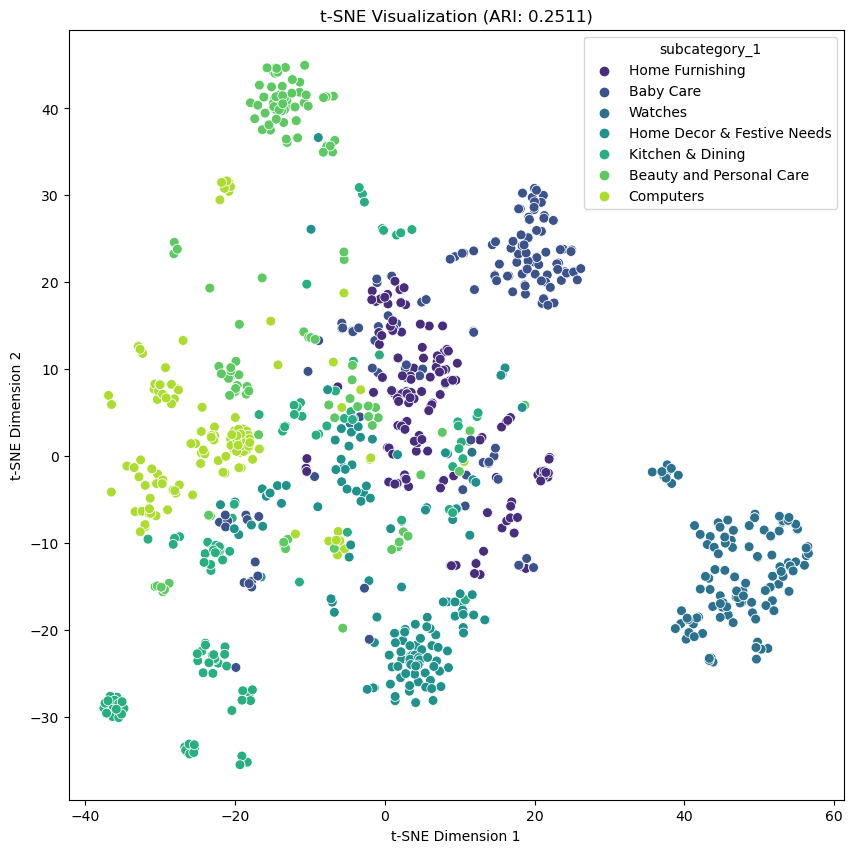


Tf-idf : 
--------
ARI: 0.0763


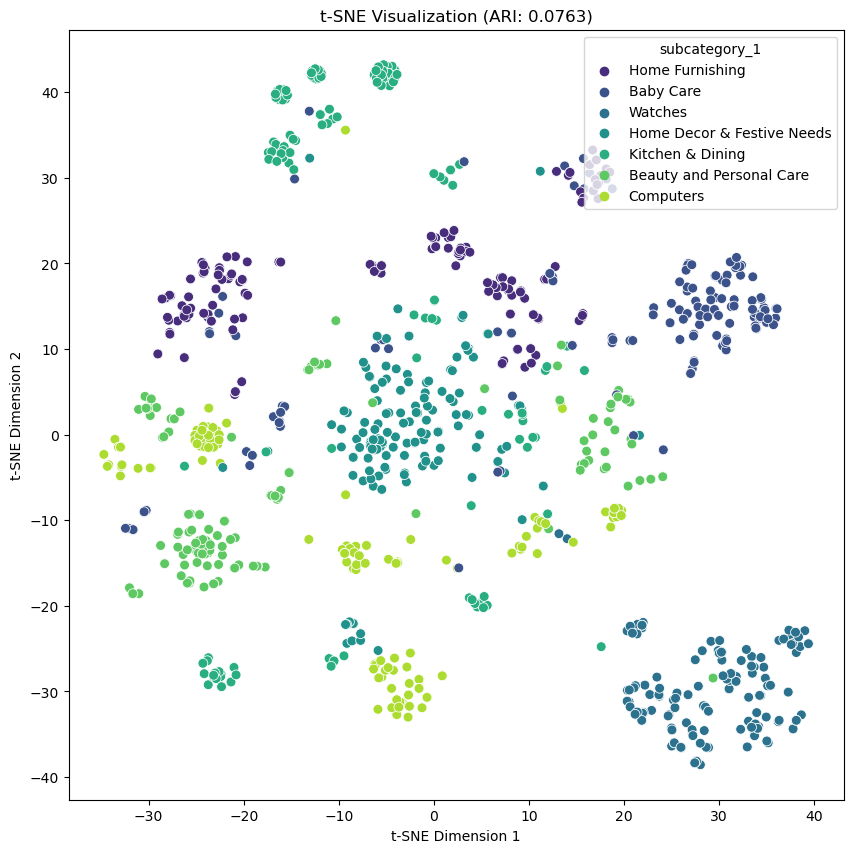

In [39]:
# Pour CountVectorizer
print("CountVectorizer : ")
print("-----------------")
ARI_cv, X_tsne_cv, labels_cv = ARI_fct(cv_transform)
TSNE_visu_fct(X_tsne_cv, labels_cv, ARI_cv)
print()

# Pour TfidfVectorizer
print("Tf-idf : ")
print("--------")
ARI_tfidf, X_tsne_tfidf, labels_tfidf = ARI_fct(tfidf_transform)
TSNE_visu_fct(X_tsne_tfidf, labels_tfidf, ARI_tfidf)


# Réduction de dimension PCA et t-SNE

In [40]:

def ARI_fct(X_transformed):
    X_transformed_dense = X_transformed.toarray()
    # Réduction de dimensionnalité avec PCA
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_transformed_dense)
    # Réduction de dimensionnalité avec t-SNE
    tsne = TSNE(n_components=2, init='random', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)
    
    labels = df["subcategory_1"]
    ARI = adjusted_rand_score(labels, np.asarray(X_pca.argmax(axis=1)).reshape(-1))
    
    print(f"ARI: {ARI:.4f}")
    
    return ARI, X_tsne, labels, X_pca

# CountVectorizer
cv_vectorizer = CountVectorizer(min_df=1, max_df=0.95 )
cv_transform = cv_vectorizer.fit_transform(preprocessed_documents)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=0.95)
tfidf_transform = tfidf_vectorizer.fit_transform(preprocessed_documents)

print("CountVectorizer : ")
print("-----------------")
ARI_cv, X_tsne_cv, labels_cv, X_pca_cv = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI_tfidf, X_tsne_tfidf, labels_tfidf, X_pca_tfidf = ARI_fct(tfidf_transform)


CountVectorizer : 
-----------------
ARI: 0.3784

Tf-idf : 
--------
ARI: 0.3327


In [52]:

def word2vec_embedding(docs):
    sentences = [doc.split() for doc in docs]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    embeddings = np.array([np.mean([model.wv[word] for word in doc], axis=0) for doc in sentences])
    return embeddings

def bert_embedding(docs):
    model = SentenceTransformer('paraphrase-distilroberta-base-v2')
    embeddings = model.encode(docs)
    return embeddings

def use_embedding(docs):
    model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
    embeddings = model(docs).numpy()
    return embeddings

def ARI_fct(X_transformed, method):
    # Réduction de dimensionnalité avec PCA
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_transformed)
    # Réduction de dimensionnalité avec t-SNE
    tsne = TSNE(n_components=2, init='random', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)
    
    labels = df["subcategory_1"]
    ARI = adjusted_rand_score(labels, np.asarray(X_pca.argmax(axis=1)).reshape(-1))
    
    print(f"ARI ({method}): {ARI:.4f}")
    
    return ARI, X_tsne, labels

# CountVectorizer
cv_vectorizer = CountVectorizer(min_df=10)
cv_transform = cv_vectorizer.fit_transform(preprocessed_documents)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10)
tfidf_transform = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Word2Vec
w2v_embeddings = word2vec_embedding(preprocessed_documents)

# BERT
bert_embeddings = bert_embedding(preprocessed_documents)

# Universal Sentence Encoder
use_embeddings = use_embedding(preprocessed_documents)

print("CountVectorizer : ")
print("-----------------")
ARI_cv, X_tsne_cv, labels_cv = ARI_fct(cv_transform.toarray(), "CountVectorizer")
print()
print("Tf-idf : ")
print("--------")
ARI_tfidf, X_tsne_tfidf, labels_tfidf = ARI_fct(tfidf_transform.toarray(), "Tf-idf")
print()
print("Word2Vec : ")
print("-----------")
ARI_w2v, X_tsne_w2v, labels_w2v = ARI_fct(w2v_embeddings, "Word2Vec")
print()
print("BERT : ")
print("-------")
ARI_bert, X_tsne_bert, labels_bert = ARI_fct(bert_embeddings, "BERT")
print()
print("USE : ")
print("-----")
ARI_use, X_tsne_use, labels_use = ARI_fct(use_embeddings, "Universal Sentence Encoder")



CountVectorizer : 
-----------------
ARI (CountVectorizer): 0.3873

Tf-idf : 
--------
ARI (Tf-idf): 0.3929

Word2Vec : 
-----------
ARI (Word2Vec): 0.1414

BERT : 
-------
ARI (BERT): 0.2223

USE : 
-----
ARI (Universal Sentence Encoder): 0.2603


CountVectorizer : 
-----------------
ARI (CountVectorizer): 0.3852


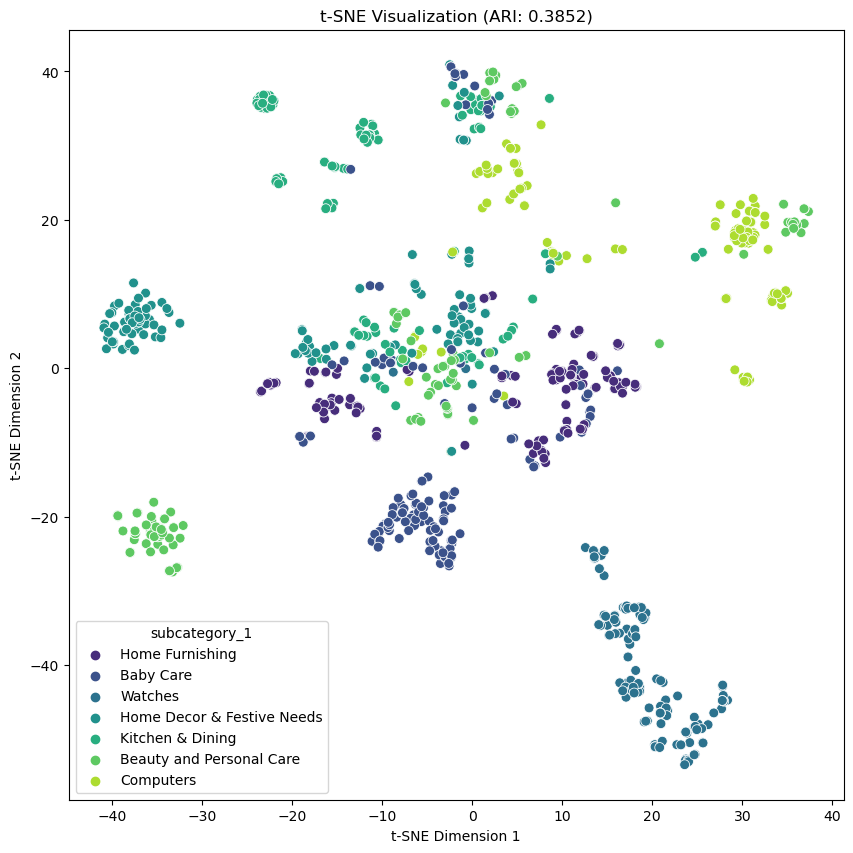


Tf-idf : 
--------
ARI (Tf-idf): 0.3967


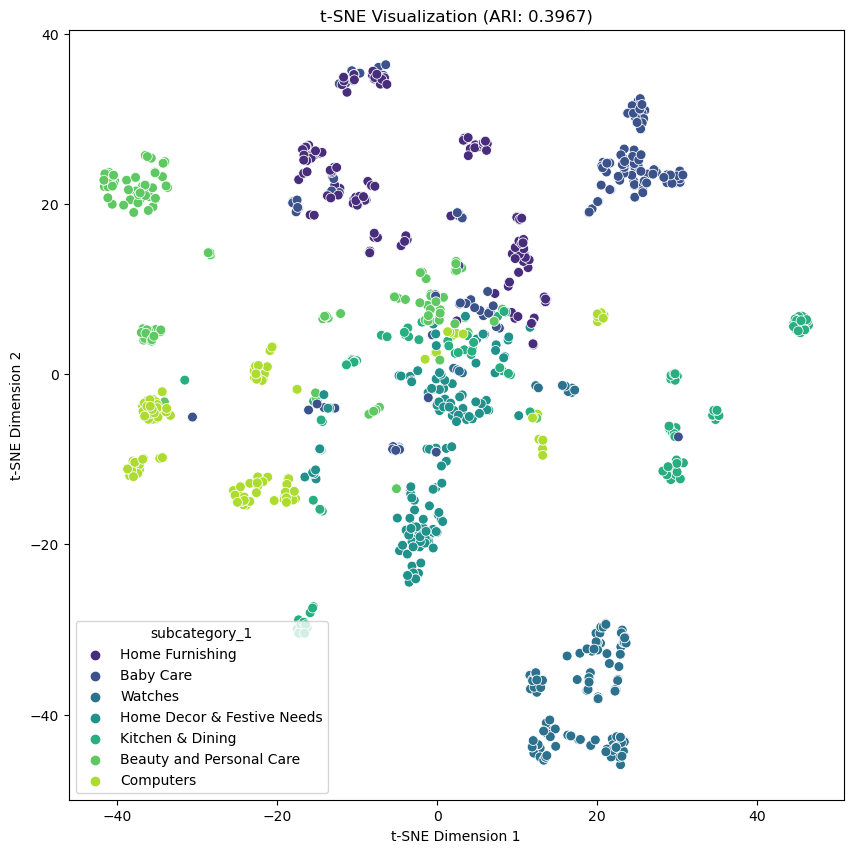


Word2Vec : 
-----------
ARI (Word2Vec): 0.1418


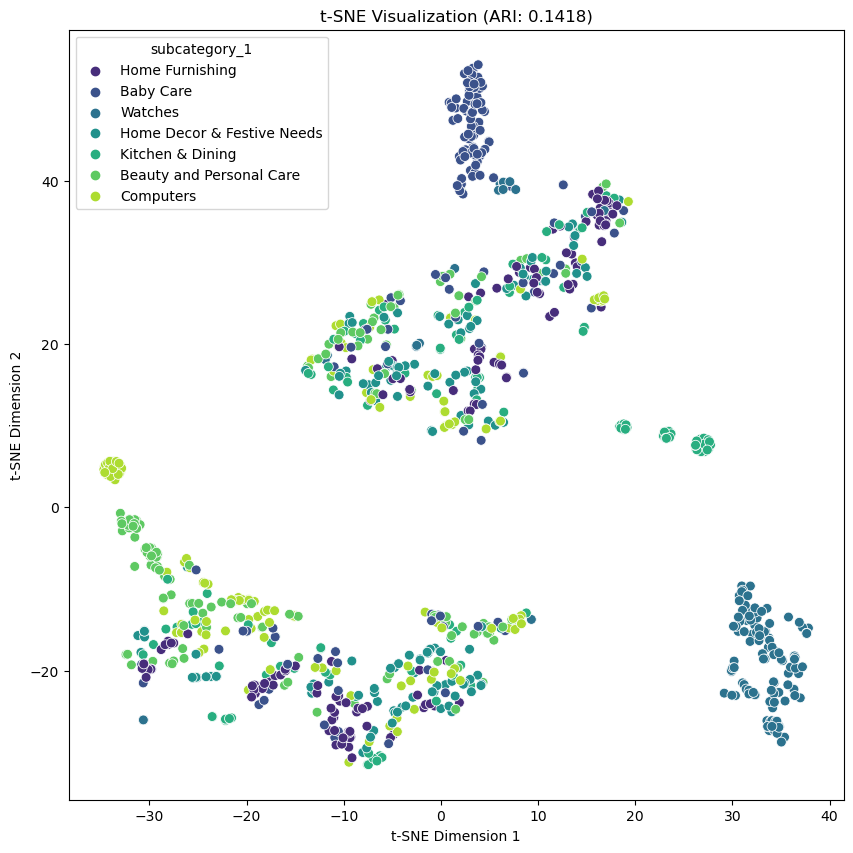


BERT : 
-------
ARI (BERT): 0.2223


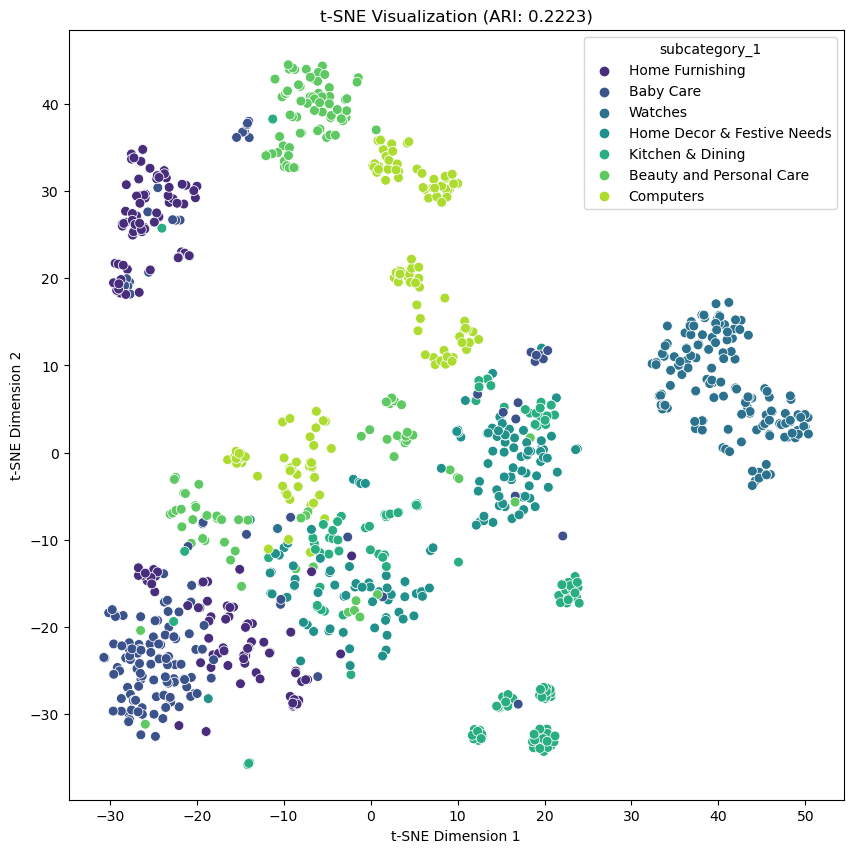


Universal Sentence Encoder : 
---------------------------
ARI (Universal Sentence Encoder): 0.2597


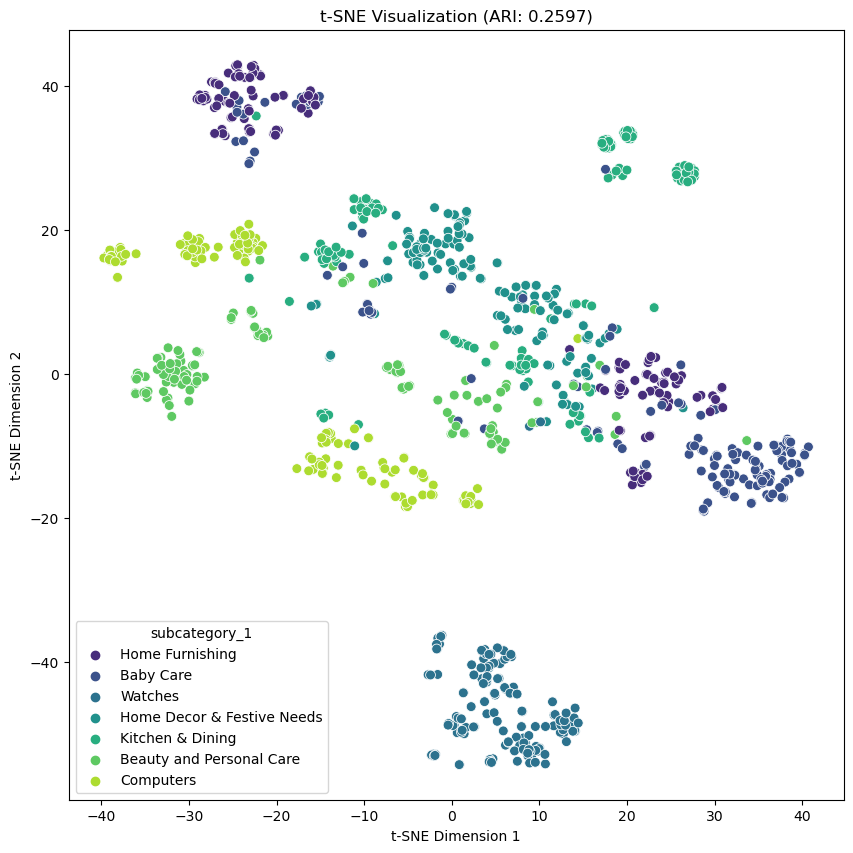

In [53]:
# Pour CountVectorizer
print("CountVectorizer : ")
print("-----------------")
cv_vectorizer = CountVectorizer(min_df=10)
cv_transform = cv_vectorizer.fit_transform(preprocessed_documents)
ARI_cv, X_tsne_cv, labels_cv = ARI_fct(cv_transform.toarray(), "CountVectorizer")
TSNE_visu_fct(X_tsne_cv, labels_cv, ARI_cv)
print()

# Pour TfidfVectorizer
print("Tf-idf : ")
print("--------")
tfidf_vectorizer = TfidfVectorizer(min_df=10)
tfidf_transform = tfidf_vectorizer.fit_transform(preprocessed_documents)
ARI_tfidf, X_tsne_tfidf, labels_tfidf = ARI_fct(tfidf_transform.toarray(), "Tf-idf")
TSNE_visu_fct(X_tsne_tfidf, labels_tfidf, ARI_tfidf)
print()

# Pour Word2Vec
print("Word2Vec : ")
print("-----------")
w2v_embeddings = word2vec_embedding(preprocessed_documents)
ARI_w2v, X_tsne_w2v, labels_w2v = ARI_fct(w2v_embeddings, "Word2Vec")
TSNE_visu_fct(X_tsne_w2v, labels_w2v, ARI_w2v)
print()

# Pour BERT
print("BERT : ")
print("-------")
bert_embeddings = bert_embedding(preprocessed_documents)
ARI_bert, X_tsne_bert, labels_bert = ARI_fct(bert_embeddings, "BERT")
TSNE_visu_fct(X_tsne_bert, labels_bert, ARI_bert)
print()

# Pour Universal Sentence Encoder (USE)
print("Universal Sentence Encoder : ")
print("---------------------------")
use_embeddings = use_embedding(preprocessed_documents)
ARI_use, X_tsne_use, labels_use = ARI_fct(use_embeddings, "Universal Sentence Encoder")
TSNE_visu_fct(X_tsne_use, labels_use, ARI_use)
print()


Tf-idf et CountVectorizer obtiennent un meilleur ARI


# Kmeans

In [47]:


def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()


CountVectorizer : 
-----------------
ARI: 0.3766


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


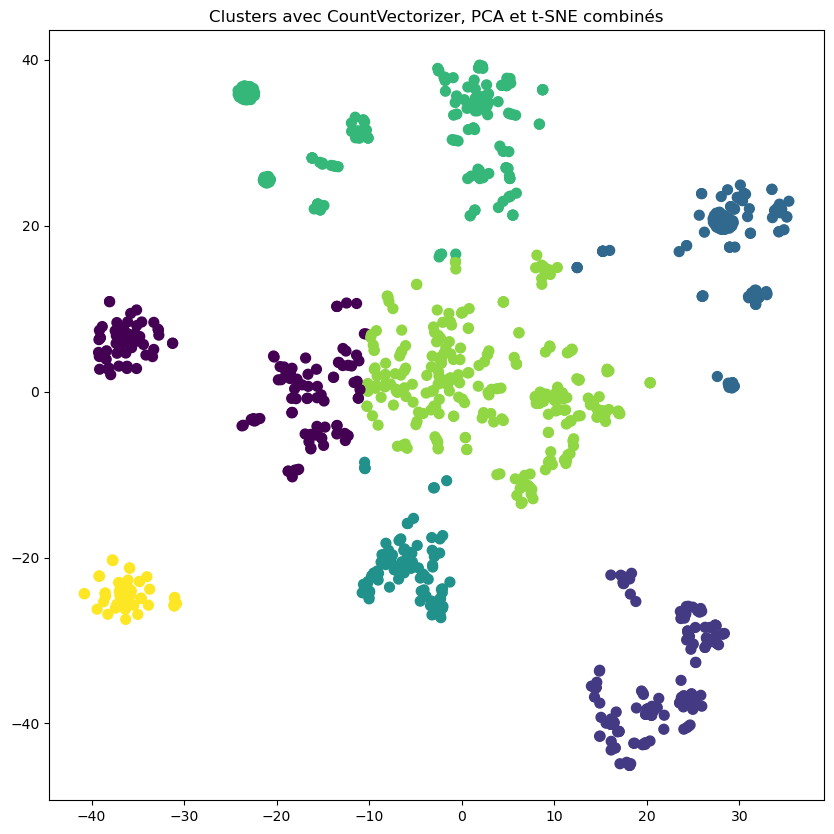


Tf-idf : 
--------
ARI: 0.3933


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


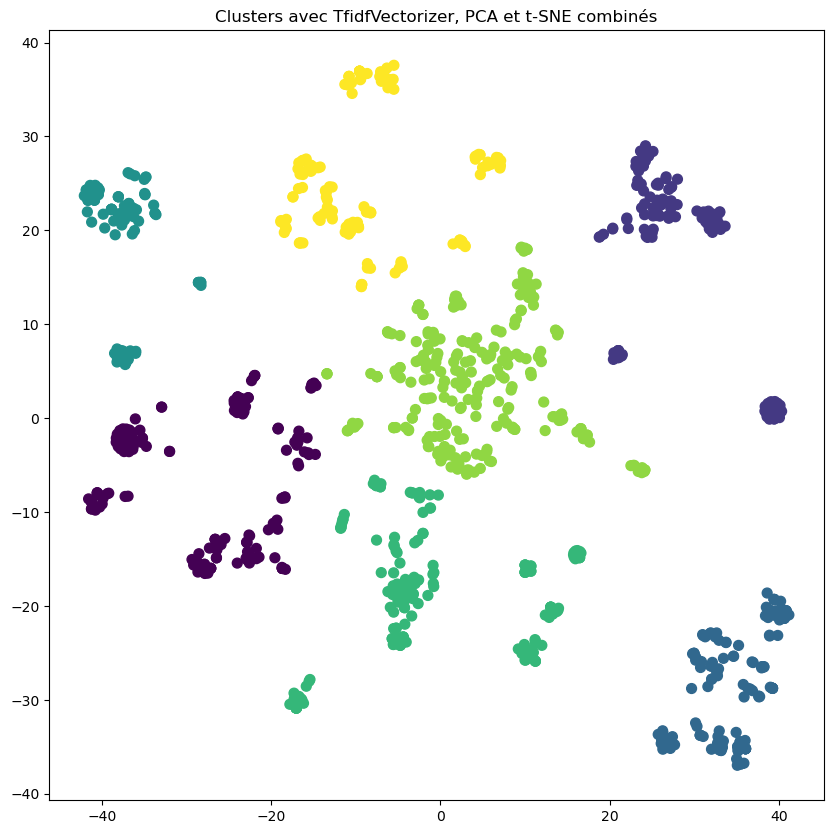

In [48]:
def ARI_fct(X_transformed, n_clusters=7):
    # Réduction de dimensionnalité avec PCA
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_transformed.toarray())
    
    # Réduction de dimensionnalité avec t-SNE
    tsne = TSNE(n_components=2, init='random', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    # Combine PCA et t-SNE
    X_combined = np.hstack((X_pca, X_tsne))

    # Clustering avec KMeans sur les données combinées
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_combined)
    
    labels = df["subcategory_1"]
    ARI = adjusted_rand_score(labels, kmeans_labels)
    
    print(f"ARI: {ARI:.4f}")
    
    return ARI, X_tsne, kmeans_labels

# CountVectorizer
cv_vectorizer = CountVectorizer(min_df=10)
cv_transform = cv_vectorizer.fit_transform(preprocessed_documents)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10)
tfidf_transform = tfidf_vectorizer.fit_transform(preprocessed_documents)

print("CountVectorizer : ")
print("-----------------")
ARI_cv, X_tsne_cv, kmeans_labels_cv = ARI_fct(cv_transform)
plot_clusters(X_tsne_cv, kmeans_labels_cv, 'Clusters avec CountVectorizer, PCA et t-SNE combinés')

print()
print("Tf-idf : ")
print("--------")
ARI_tfidf, X_tsne_tfidf, kmeans_labels_tfidf = ARI_fct(tfidf_transform)
plot_clusters(X_tsne_tfidf, kmeans_labels_tfidf, 'Clusters avec TfidfVectorizer, PCA et t-SNE combinés')


# IMAGE

In [55]:
path = 'C:/Users/boukh/OneDrive/Bureau/OpenClassRooms/Projet 6 openclassroom/Images'

# Obtenir tous les fichiers dans le répertoire
files = os.listdir(path)

# Filtrer les fichiers qui ont une extension d'image
image_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')]

# Compter le nombre de fichiers d'image
num_photos = len(image_files)

# Afficher le nombre de photos
print("Nombre de photos : {}".format(num_photos))


Nombre de photos : 1050


In [56]:
num_photos

1050

In [57]:
image_files

['009099b1f6e1e8f893ec29a7023153c4.jpg',
 '0096e89cc25a8b96fb9808716406fe94.jpg',
 '00cbbc837d340fa163d11e169fbdb952.jpg',
 '00d84a518e0550612fcfcba3b02b6255.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '0131e5d87b72877702d536299cf83b75.jpg',
 '020d2daba55a723128e4e07c0b0393a9.jpg',
 '02127f52e96fb72c66bf081d25104ef8.jpg',
 '025a85a3d1cddc6307f7dc075d8d2132.jpg',
 '02a53d335775b652f22f41b529b9d646.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '032e812adcd11a38fd8b764891a852ff.jpg',
 '037b39bef3db7ccd264c577a0edf0c0a.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '04f9f818e2d657b873b07578cfe2eade.jpg',
 '04f9ff160a1561e3656350f4bd6b8c50.jpg',
 '050ea3acb555bf641e7ae9b4f3ba684a.jpg',
 '052559ede419996737893eb47568ee7f.jpg',
 '057836ecde71565f8ebdd576e41fdc96.jpg',
 '059493eeb88ebb4cc08d1522f3f87c3f.jpg',
 '059bc43e03e1824a9ab6466e32e5f137.jpg',
 '06749cbff1487f

In [58]:
## chargement de chaque image a l'aide du chemin complet
def chemin_complet(image):
    image = "Images/" + image
    return image

In [59]:
# On repart de notre dataframe df  auquel nous rajoutons les données images
df["image"] = data["image"].copy()

# On reformate la colonne image de manière à avoir le chemin complet des fichiers
df["image"] = df["image"].apply(chemin_complet)

df.head()

C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\302444714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["image"] = data["image"].copy()
C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\302444714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["image"] = df["image"].apply(chemin_complet)


description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                               product_category_tree    subcategory_1  \
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing   

            subcategory_2                                       cleaned_text  \
0  Curtains & Accessories  key features elegance polyester multicolor abs...   
1        Baby Bath & Skin  specifications sathiyas cotton bath towel 3 ba...   
2        Baby Bath & Skin  key features eurospa cotton terry face towel s...   
3               Bed Linen  key features santosh royal fashion cotton prin...   
4               Bed Linen  key features jaipur print cotton floral king s...   

                                      stemmed_tokens  \
0  [key, featur, eleg, polyest, multicolor, abstr...   
1  [specif, sathiya, cotton, bath, towel, 3, bath...   
2  [key, featur, eurospa, cotton, terri, face, to...   
3  [key, featur, santosh, royal, fashion, cotton,...   
4  [key, featur, jaipur, print, cotton, floral, k...   

                                   lemmatized_tokens  \
0  [key, featur, eleg, polyest, multicolor, abstr...   
1  [specif, sathiya, cotton, bath, towel, 3, bath...   
2  [key, featur, eurospa, cotton, terri, face, to...   
3  [key, featur, santosh, royal, fashion, cotton,...   
4  [key, featur, jaipur, print, cotton, floral, k...   

                                         image  
0  Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  Images/7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  Images/64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  Images/d4684dcdc759dd9cdf41504698d737d8.jpg  
4  Images/6325b6870c54cd47be6ebfbffa620ec7.jpg

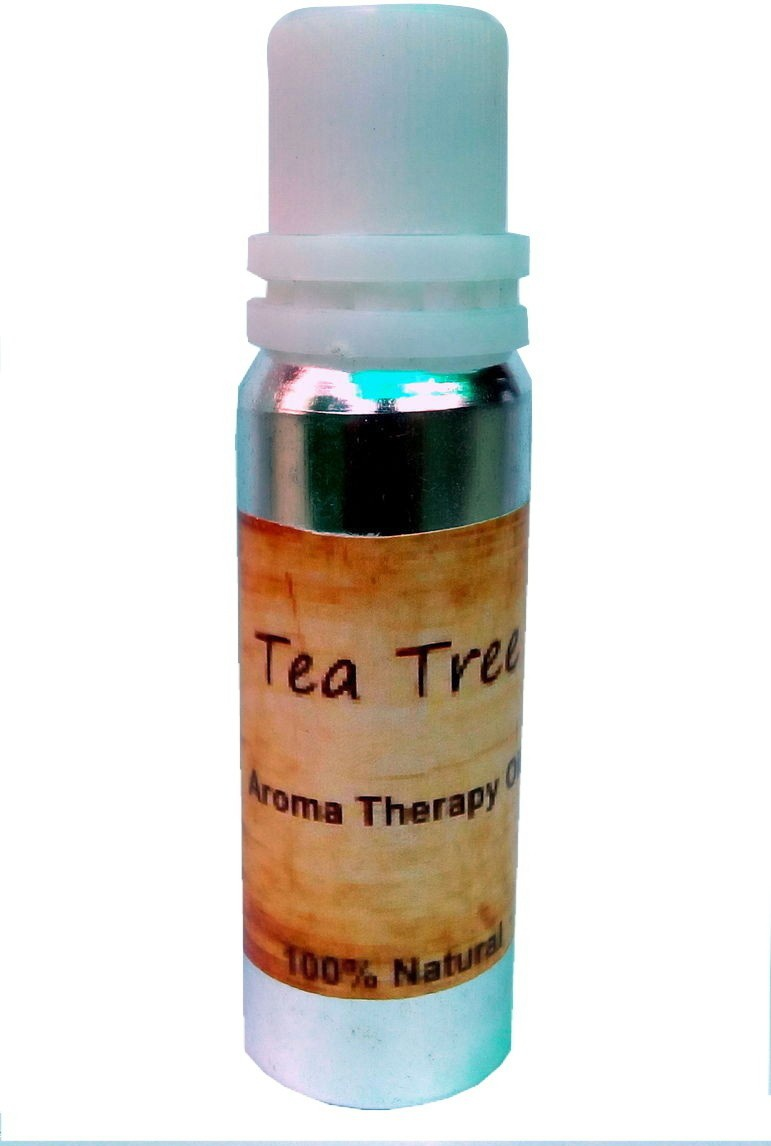

In [61]:


# Sélectionner un index aléatoire dans la plage des indices du DataFrame
random_index = random.randint(0, len(df)-1)

# Récupérer le chemin d'accès à l'image correspondante
image_path = df.loc[random_index, 'image']

# Afficher l'image à l'intérieur du notebook
display(Image(filename=image_path))

In [62]:
# Selection des colonnes

In [63]:
dfcl = df[['image','subcategory_1']]

In [64]:
dfcl

image    subcategory_1
0     Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing
1     Images/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care
2     Images/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care
3     Images/d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing
4     Images/6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing
...                                           ...              ...
1045  Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg        Baby Care
1046  Images/fd6cbcc22efb6b761bd564c28928483c.jpg        Baby Care
1047  Images/5912e037d12774bb73a2048f35a00009.jpg        Baby Care
1048  Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg        Baby Care
1049  Images/f2f027ad6a6df617c9f125173da71e44.jpg        Baby Care

[1050 rows x 2 columns]

In [65]:
# Affichage des labels qui composent la sous-catégorie1
dfcl.subcategory_1.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [66]:

# Création d'une liste de labels
list_labels = ['Home Furnishing', 'Baby Care', 'Watches',
               'Home Decor & Festive Needs', 'Kitchen & Dining',
               'Beauty and Personal Care', 'Computers']

# Label encoding 
le = preprocessing.LabelEncoder()

# Création d'une colonne "label" avec label encoding des "label_name"
dfcl["label"] = le.fit_transform(dfcl["subcategory_1"])
dfcl

C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\3008486700.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcl["label"] = le.fit_transform(dfcl["subcategory_1"])


image    subcategory_1  label
0     Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing      4
1     Images/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care      0
2     Images/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care      0
3     Images/d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing      4
4     Images/6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing      4
...                                           ...              ...    ...
1045  Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg        Baby Care      0
1046  Images/fd6cbcc22efb6b761bd564c28928483c.jpg        Baby Care      0
1047  Images/5912e037d12774bb73a2048f35a00009.jpg        Baby Care      0
1048  Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg        Baby Care      0
1049  Images/f2f027ad6a6df617c9f125173da71e44.jpg        Baby Care      0

[1050 rows x 3 columns]

In [67]:
# Regroupement des données par label
dfcl.groupby("label").count()

image  subcategory_1
label                      
0        150            150
1        150            150
2        150            150
3        150            150
4        150            150
5        150            150
6        150            150

In [68]:
from os import listdir
path = 'C:/Users/boukh/OneDrive/Bureau/OpenClassRooms/Projet 6 openclassroom/Images/'
list_photos = [file for file in listdir(path)]
print("Nombre de photos : {}".format(len(list_photos)))

Nombre de photos : 1050


In [69]:
list_photos

['009099b1f6e1e8f893ec29a7023153c4.jpg',
 '0096e89cc25a8b96fb9808716406fe94.jpg',
 '00cbbc837d340fa163d11e169fbdb952.jpg',
 '00d84a518e0550612fcfcba3b02b6255.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '0131e5d87b72877702d536299cf83b75.jpg',
 '020d2daba55a723128e4e07c0b0393a9.jpg',
 '02127f52e96fb72c66bf081d25104ef8.jpg',
 '025a85a3d1cddc6307f7dc075d8d2132.jpg',
 '02a53d335775b652f22f41b529b9d646.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '032e812adcd11a38fd8b764891a852ff.jpg',
 '037b39bef3db7ccd264c577a0edf0c0a.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '04f9f818e2d657b873b07578cfe2eade.jpg',
 '04f9ff160a1561e3656350f4bd6b8c50.jpg',
 '050ea3acb555bf641e7ae9b4f3ba684a.jpg',
 '052559ede419996737893eb47568ee7f.jpg',
 '057836ecde71565f8ebdd576e41fdc96.jpg',
 '059493eeb88ebb4cc08d1522f3f87c3f.jpg',
 '059bc43e03e1824a9ab6466e32e5f137.jpg',
 '06749cbff1487f

Home Furnishing


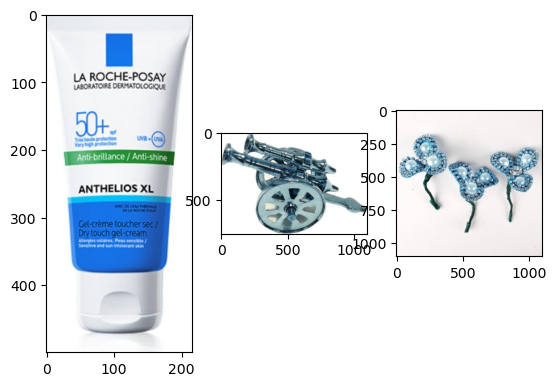

Baby Care


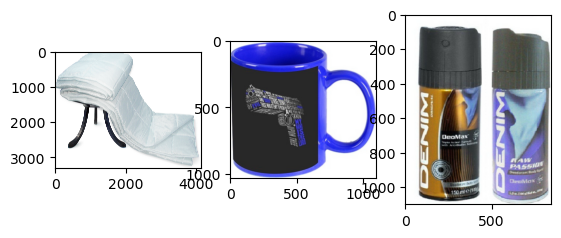

Watches


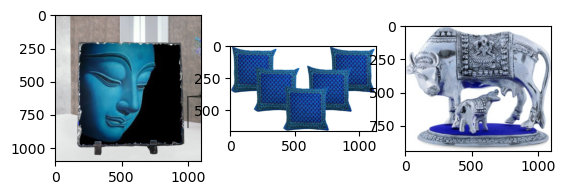

Home Decor & Festive Needs


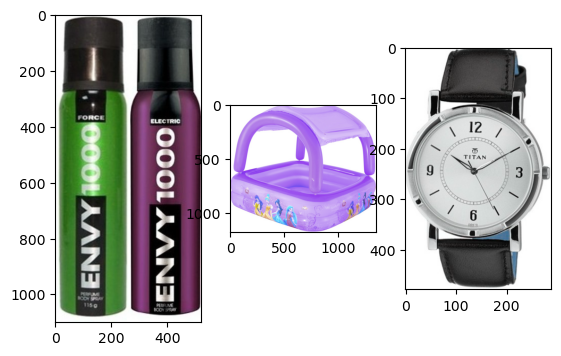

Kitchen & Dining


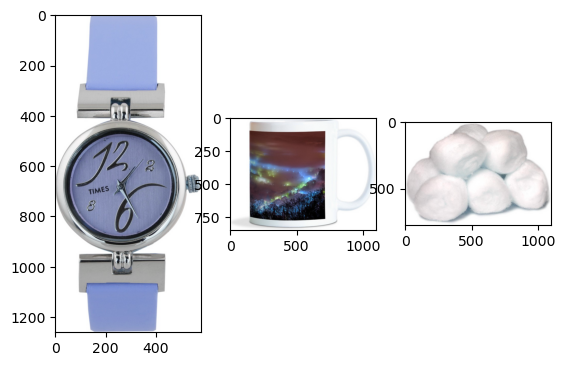

Beauty and Personal Care


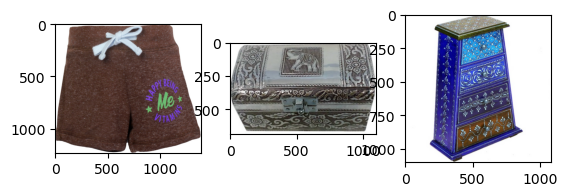

Computers


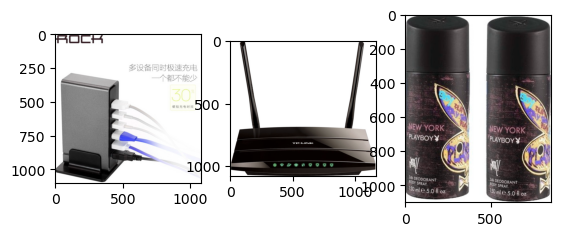

In [70]:



def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]==name]
    return list_image_name

list_home_furnishing=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="Home Furnishing"]
list_Baby_care=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="Baby Care"]
list_watches=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="Watches"]
list_home_decor=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="Home Decor & Festive Needs"]
list_kitchen=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="Kitchen & Dining"]
list_beauty=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="'Beauty and Personal Care"]
list_computers=[list_photos[i] for i in range(len(dfcl)) if dfcl["subcategory_1"][i]=="Computers"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = cv2.imread(filename)
        plt.imshow(image)
    plt.show()

# ORB

## Descripteurs de l'image 

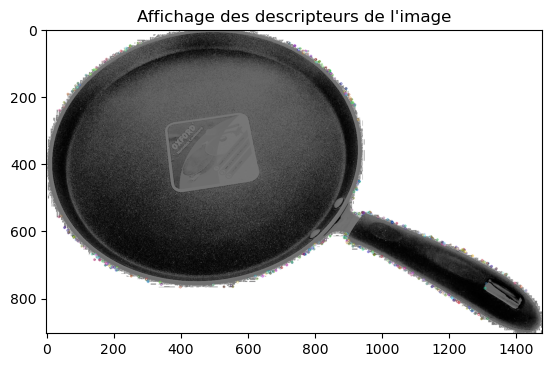

Descripteurs :  (500, 32)

[[ 20 184 156 ... 120 131 155]
 [166 237 192 ... 123 240 136]
 [164 237 132 ... 127 210 136]
 ...
 [ 70 237 214 ... 123 209 128]
 [ 98 168 212 ...   8  97 136]
 [182 173 198 ... 123 113 128]]


In [75]:
orb = cv2.ORB_create()
image = cv2.imread(path+list_photos[1],0) # passage en gris
image = cv2.equalizeHist(image)   # equalisation des histogrammes de l'image
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.title("Affichage des descripteurs de l'image")
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

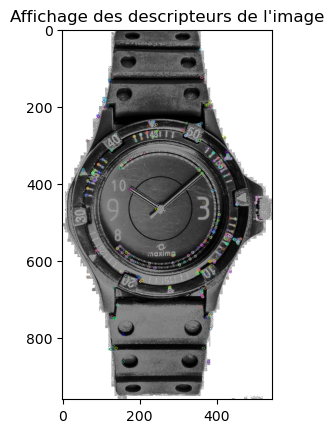

Descripteurs :  (500, 32)

[[227 116  59 ... 134   3 117]
 [254  94 112 ... 247  46 129]
 [ 72 225 115 ... 130 199  99]
 ...
 [255 157  54 ... 126 254  95]
 [250  33 226 ... 204 254  94]
 [186 252  32 ...  28 222 254]]


In [73]:
# Autre Test sur la 20ème image
orb = cv2.ORB_create()
image = cv2.imread(path+list_photos[20],0) # passage en gris
image = cv2.equalizeHist(image)   # equalisation des histogrammes de l'image
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.title("Affichage des descripteurs de l'image")
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [ ]:
## Creation des descripteurs de chaque image

In [74]:
# identification des keypoints et l'extraction des descripteurs ORB pour chaque image
import time
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            24.10 secondes


C:\Users\boukh\AppData\Local\Temp\ipykernel_8000\3270874049.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orb_keypoints_by_img = np.asarray(orb_keypoints)


## creation des clusters descripteur 


In [76]:

#clustering des descripteurs ORB en utilisant l'algorithme Mini-Batch K-Means

temps1 = time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1 = time.time() - temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :             6.34 secondes


## creation des features image 


In [77]:
# Creation of histograms (features)
temps1 = time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1 = time.time() - temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.10 secondes


# Réduction dimension PCA et t-SNE

In [78]:

# Pourcentage de la variance à conserver
variance = 0.99

# Créer l'objet PCA
pca = PCA(n_components=variance)

# Adapter le modèle PCA aux données
pca.fit(im_features)

# Transformer les données sur les composantes principales qui expliquent 99% de la variance
im_features_pca = pca.transform(im_features)

print("Shape après PCA :", im_features_pca.shape)

Shape après PCA : (1050, 579)


In [79]:

# Création de l'objet t-SNE avec les paramètres spécifiés
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)

# Application du t-SNE aux données
im_features_tsne = tsne.fit_transform(im_features_pca)

# Création d'un DataFrame avec les résultats
df_tsne = pd.DataFrame(im_features_tsne, columns=['tsne1', 'tsne2'])

# Ajout des étiquettes de classe au DataFrame
df_tsne["class"] = df['subcategory_1']

print(df_tsne.shape)


(1050, 3)


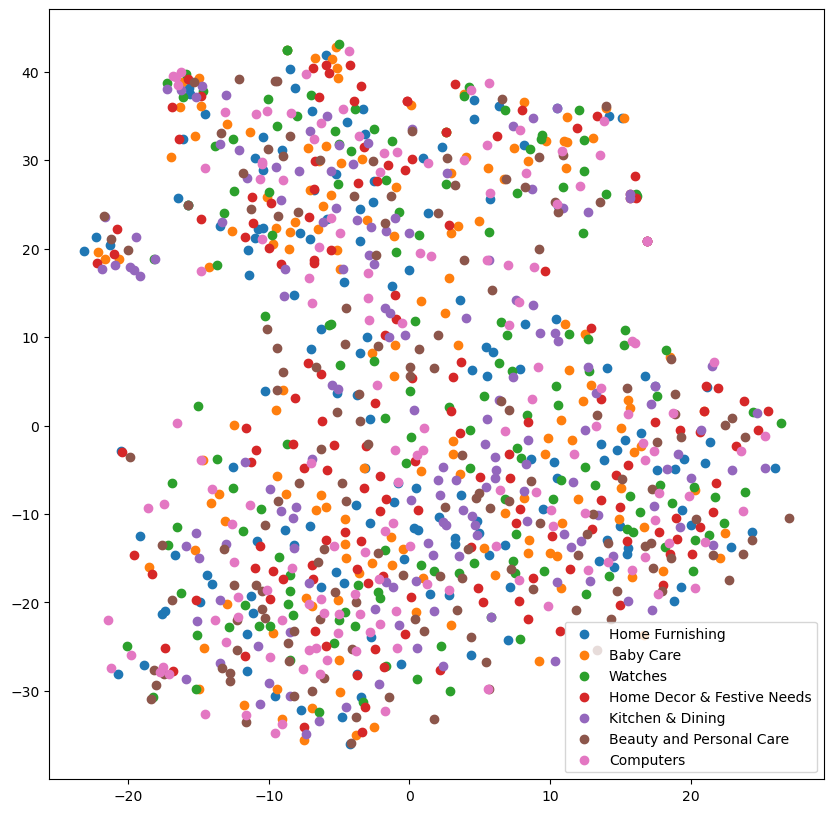

In [80]:

# Création de la figure
plt.figure(figsize=(10, 10))

# Création d'un nuage de points pour chaque classe
for class_name in df_tsne['class'].unique():
    # Sélection des points de données de cette classe
    class_data = df_tsne[df_tsne['class'] == class_name]
    # Création d'un nuage de points pour cette classe
    plt.scatter(class_data['tsne1'], class_data['tsne2'], label=class_name)

# Ajout d'une légende
plt.legend()

# Affichage de la figure
plt.show()


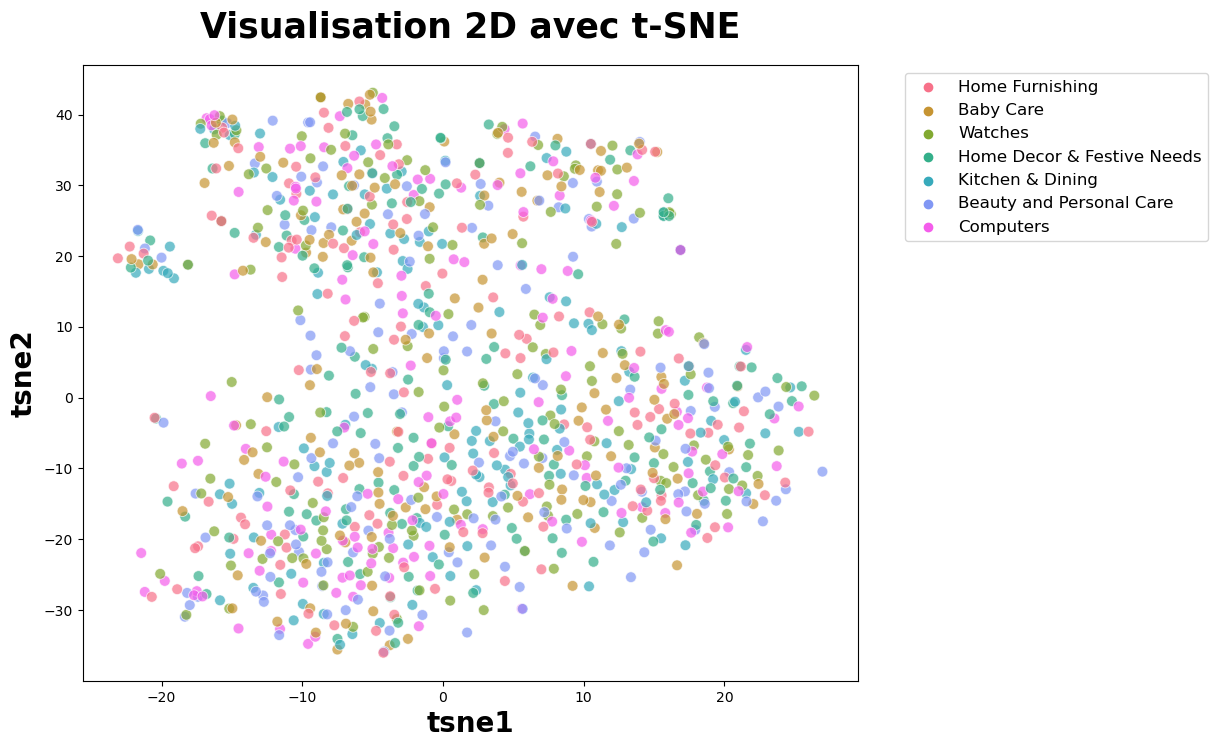

In [81]:

# Création de la figure
plt.figure(figsize=(10, 8))

# Création du nuage de points avec seaborn
scatter = sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_tsne,
                          palette=sns.color_palette('husl', n_colors=len(df_tsne['class'].unique())), 
                          s=60, alpha=0.7)

# Ajout des titres des axes et de la figure
scatter.set_title('Visualisation 2D avec t-SNE', fontsize=25, pad=20, fontweight='bold')
scatter.set_xlabel('tsne1', fontsize=20, fontweight='bold')
scatter.set_ylabel('tsne2', fontsize=20, fontweight='bold')

# Ajustement de la légende
plt.legend(prop={'size': 12}, bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichage de la figure
plt.show()


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


(1050, 4)


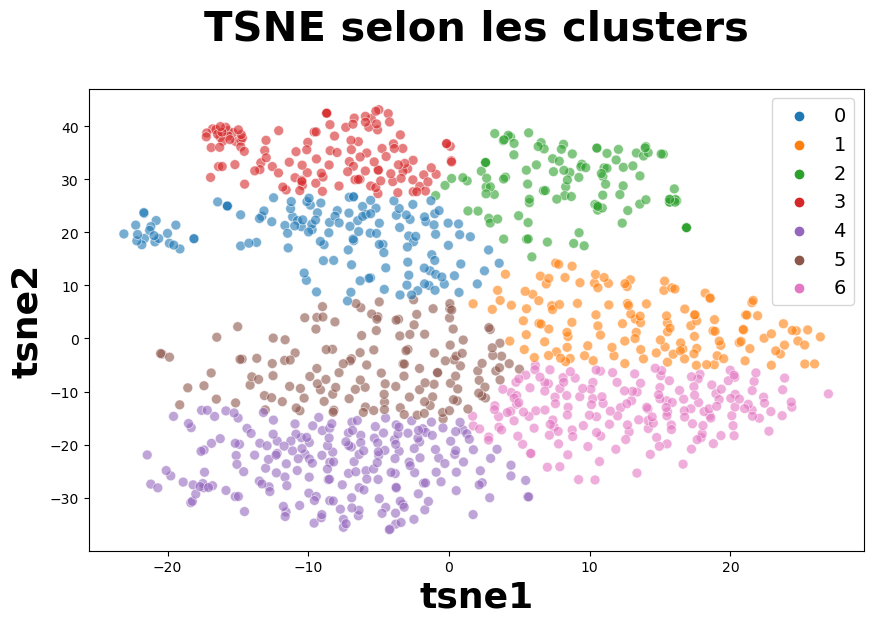

ARI :  0.001020455180495041


In [82]:


# Construction de l'objet KMeans
kmeans_model = KMeans(n_clusters=7, random_state=6)

# Entrainement du modèle KMeans
kmeans_model.fit(im_features_tsne)

# Récupération des labels prédits par le modèle
predicted_labels = kmeans_model.labels_

# Ajout des labels de cluster au DataFrame
df_tsne["cluster"] = predicted_labels

# Affichage des dimensions du DataFrame
print(df_tsne.shape)

# Création de la figure
plt.figure(figsize=(10,6))

# Création du scatter plot avec seaborn
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), 
    s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

# Ajout des titres des axes et de la figure
plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

# Affichage de la figure
plt.show()

# Récupération des labels réels
true_labels = df["subcategory_1"]

# Calcul de l'ARI
ari = adjusted_rand_score(true_labels, predicted_labels)

# Affichage de l'ARI
print("ARI : ", ari)


In [84]:
dfcl.to_csv('dataCNN.csv', index=False)

